Dataset Preview:
   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065

Missing Values:
SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

Mean Squared Error (MSE): 2437839375.96
R-squared Score: 0.58


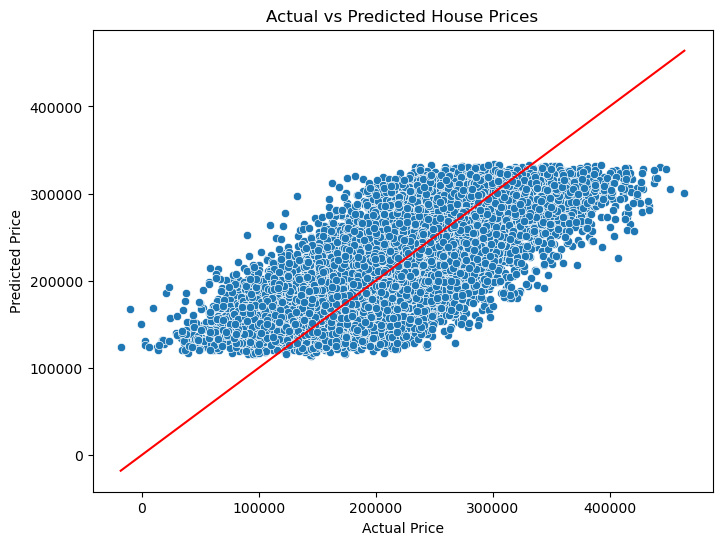


Model Coefficients:
            Coefficient
SquareFeet    99.359092
Bedrooms    5229.146742
Bathrooms   2963.006788

Intercept: 1249.44


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv("housing_price_dataset.csv")

print("Dataset Preview:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

features = ['SquareFeet', 'Bedrooms', 'Bathrooms']
target = ['Price']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

plt.figure(figsize=(8,6))

sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten())
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")

min_val = min(y_test.values.flatten().min(), y_pred.flatten().min())
max_val = max(y_test.values.flatten().max(), y_pred.flatten().max())
plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.show()

coefficients = pd.DataFrame(model.coef_.T, features, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)

print(f"\nIntercept: {model.intercept_[0]:.2f}") 